### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')
require('broom')
require('GGally')
require('fread')
require('data.table')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse
Loading required package: broom
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: fread
Loading required package: data.table
data.table 1.17.0 using 4 threads (see ?getDTthreads).  Latest news: r-datatable.com

Attaching package: ‘data.table’

The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

In addition: Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
  there is no package called ‘fread’


In [27]:
%%R

df_filtered <- fread('../data/final_data_filtered.csv')

In [28]:
%%R


df_filtered %>% 
arrange(desc(susp_black_white_ratio)) %>%
select(SCH_NAME, black_student_suspension_total, black_student_pop, white_student_pop , white_student_suspension_total, susp_black_white_ratio) %>% head(5)

                      SCH_NAME black_student_suspension_total black_student_pop white_student_pop white_student_suspension_total susp_black_white_ratio
                      <char>                          <int>             <int>             <int>                          <int>                  <num>
                Ligon Middle                            123               273               454                              2              102.27473
 SOUTHSIDE ELEMENTARY SCHOOL                              5                 9               566                              4               78.61111
         Spencer High School                              4                12               646                              3               71.77778
          Ramsey High School                              4                18               640                              2               71.11111
     Earl Legette Elementary                              7                11               313   

# Single Variable Linear Regressions

### Does median income in a school's community correlate with the ratio?

In [29]:
%%R

income_susp_lm <- lm(susp_black_white_ratio ~ med_hh_inc, data = df_filtered)

In [30]:
%%R
options(width = 5000)

print(summary(income_susp_lm))
# using tidy to actually see the terms
tidy(income_susp_lm)


Call:
lm(formula = susp_black_white_ratio ~ med_hh_inc, data = df_filtered)

Residuals:
   Min     1Q Median     3Q    Max 
-5.185 -1.574 -0.745  0.464 69.173 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
 1.209e+00  1.539e-01   7.854 5.21e-15 ***
 2.888e-05  2.020e-06  14.298  < 2e-16 ***
---
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 3.606 on 3837 degrees of freedom
  (18308 observations deleted due to missingness)
Multiple R-squared:  0.05059,	Adjusted R-squared:  0.05034 
 204.4 on 1 and 3837 DF,  p-value: < 2.2e-16

# A tibble: 2 × 5
  term         estimate  std.error statistic  p.value
  <chr>           <dbl>      <dbl>     <dbl>    <dbl>
1 (Intercept) 1.21      0.154           7.85 5.21e-15
2 med_hh_inc  0.0000289 0.00000202     14.3  3.20e-45


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 18308 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 18308 rows containing missing values or values outside the scale range (`geom_point()`). 



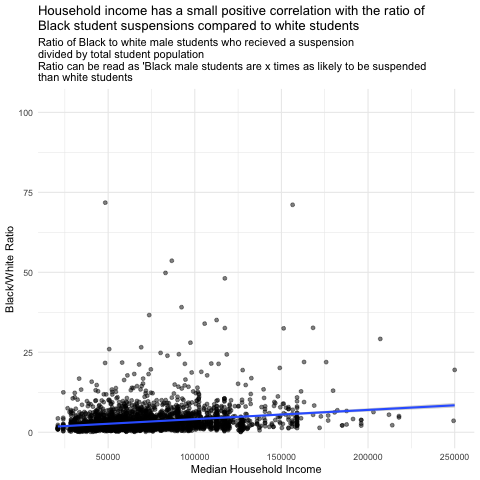

In [31]:
%%R

df_filtered %>%
    ggplot(aes(x = (med_hh_inc), y = susp_black_white_ratio)) + 
    geom_point(alpha = .5) + 
    xlab("Median Household Income") +
    ylab("Black/White Ratio") +
    labs(title = "Household income has a small positive correlation with the ratio of\nBlack student suspensions compared to white students",
        subtitle = "Ratio of Black to white male students who recieved a suspension\ndivided by total student population\nRatio can be read as 'Black male students are x times as likely to be suspended\nthan white students") +
    geom_smooth(method = "lm") + 
    theme_minimal()

## Does community inequality have a relationship with the ratio? 

In [32]:
%%R

ineq_susp_lm <- lm(susp_black_white_ratio ~ gini_inequality, data = df_filtered)
print(summary(ineq_susp_lm))
# using tidy to actually see the terms
tidy(ineq_susp_lm)


Call:
lm(formula = susp_black_white_ratio ~ gini_inequality, data = df_filtered)

Residuals:
   Min     1Q Median     3Q    Max 
-3.641 -1.687 -0.886  0.443 68.485 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
   5.7299     0.5202  11.014  < 2e-16 ***
  -5.5703     1.1594  -4.805 1.61e-06 ***
---
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 3.688 on 3840 degrees of freedom
  (18305 observations deleted due to missingness)
Multiple R-squared:  0.005976,	Adjusted R-squared:  0.005717 
 23.08 on 1 and 3840 DF,  p-value: 1.61e-06

# A tibble: 2 × 5
  term            estimate std.error statistic  p.value
  <chr>              <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)         5.73     0.520     11.0  8.48e-28
2 gini_inequality    -5.57     1.16      -4.80 1.61e- 6


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 18305 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 18305 rows containing missing values or values outside the scale range (`geom_point()`). 



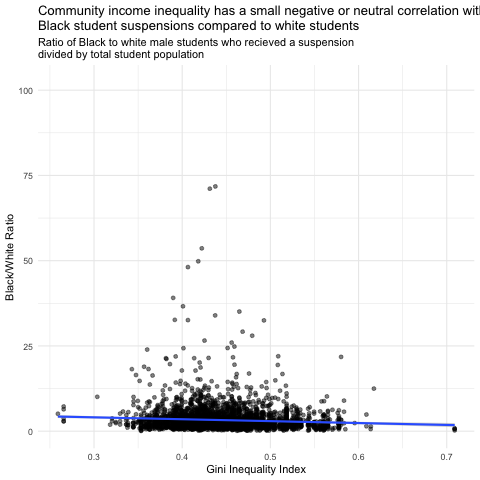

In [33]:
%%R

df_filtered %>%
    ggplot(aes(x = (gini_inequality), y = susp_black_white_ratio)) + 
    geom_point(alpha = .5) + 
    xlab("Gini Inequality Index") +
    ylab("Black/White Ratio") +
    labs(title = "Community income inequality has a small negative or neutral correlation with the ratio of\nBlack student suspensions compared to white students",
        subtitle = "Ratio of Black to white male students who recieved a suspension\ndivided by total student population") +      
geom_smooth(method = "lm") + 
    theme_minimal()

## Does community education have a relationship with the ratio? 

In [34]:
%%R

college_education_lm <- lm(susp_black_white_ratio ~ bach_plus_prop, data = df_filtered)
print(summary(college_education_lm))
# using tidy to actually see the terms
tidy(college_education_lm)


Call:
lm(formula = susp_black_white_ratio ~ bach_plus_prop, data = df_filtered)

Residuals:
   Min     1Q Median     3Q    Max 
-4.355 -1.606 -0.785  0.500 68.876 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
   1.8397     0.1314   14.00   <2e-16 ***
   4.2962     0.3597   11.94   <2e-16 ***
---
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 3.628 on 3850 degrees of freedom
  (18295 observations deleted due to missingness)
Multiple R-squared:  0.03573,	Adjusted R-squared:  0.03548 
 142.7 on 1 and 3850 DF,  p-value: < 2.2e-16

# A tibble: 2 × 5
  term           estimate std.error statistic  p.value
  <chr>             <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)        1.84     0.131      14.0 1.75e-43
2 bach_plus_prop     4.30     0.360      11.9 2.57e-32


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 18295 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 18295 rows containing missing values or values outside the scale range (`geom_point()`). 



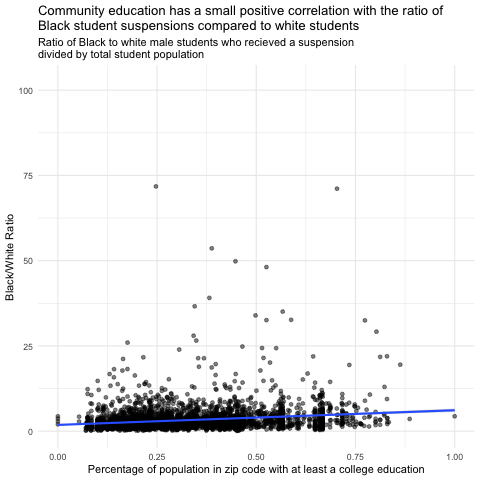

In [35]:
%%R

df_filtered %>%
    ggplot(aes(x = (bach_plus_prop), y = susp_black_white_ratio)) + 
    geom_point(alpha = .5) + 
    xlab("Percentage of population in zip code with at least a college education") +
    ylab("Black/White Ratio") +
    labs(title = "Community education has a small positive correlation with the ratio of\nBlack student suspensions compared to white students",
        subtitle = "Ratio of Black to white male students who recieved a suspension\ndivided by total student population") +      
geom_smooth(method = "lm") + 
    theme_minimal()

## Does black student population have a relationship with the ratio? 

`geom_smooth()` using formula = 'y ~ x'


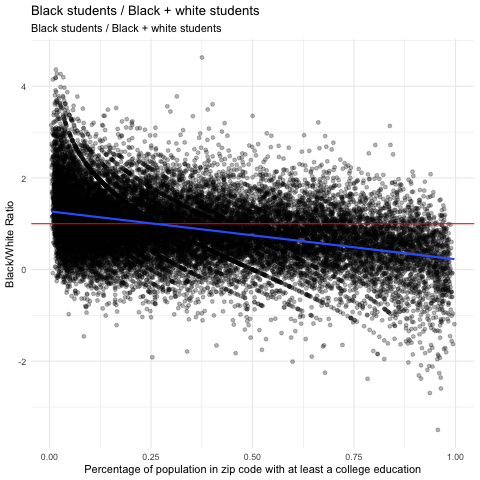

In [36]:
%%R

df_filtered %>%
    ggplot(aes(x = black_white_pop_ratio, y = log(susp_black_white_ratio))) + 
    geom_point(alpha = .3) + 
    xlab("Percentage of black students to white students") +
    ylab("Black/White Ratio") +
    geom_hline(yintercept=1, color="red") +
    labs(title = "Black students / Black + white students",
        subtitle = "Black students / Black + white students") +      
geom_smooth(method = "lm") + 
    theme_minimal()

# Multivariate regression
Add in school racial demographics and school size and teacher student ratio, elementary schools, urban schools

In [ ]:
%%R

mult_lm <- lm(log(susp_black_white_ratio) ~  
                factor(SCH_GRADE_PS) +
                factor(SCH_GRADE_G06) +
                factor(SCH_GRADE_G07) +
                factor(SCH_GRADE_G08) +
                factor(SCH_GRADE_G09) +
                factor(SCH_GRADE_G10) +
                factor(SCH_GRADE_G11) +
                factor(SCH_GRADE_G12) + 
              factor(SCH_SSCLASSES_IND) + #single sex classes
              factor(SCH_GT_IND) + # gifted program
             teacher_prop + # total teachers / school pop
              security_pop_bool + 
              security_pop + 
              law_prop + 
              counc_prop + 
              cert_teacher_prop + 
              total_susp_per_pop + 
              school_pop +
              reduced_free_lunch_prop + 
              log(black_white_pop_ratio)
              , data = df_filtered)

print(summary(mult_lm))
# using tidy to actually see the terms


In [ ]:
%%R
model_data <- model.frame(mult_lm)
missing_rows <- df_filtered[!rownames(df_filtered) %in% rownames(model_data), ]

# Count NAs for each variable in the missing rows
na_count <- sapply(missing_rows, function(x) sum(is.na(x)))

data.frame(
  variable = names(na_count),
  n_missing = na_count
)

In [ ]:
%%R

print(tidy(mult_lm), n =30)

## Examine correlations


In [ ]:
%%R
options(repr.plot.width = 30, repr.plot.height = 30)

ggpairs(df_filtered %>% select(
    susp_black_white_ratio , 
             teacher_prop , # total teachers / school pop
              security_pop ,
              law_prop ,
              counc_prop ,
              cert_teacher_prop,              
                total_susp_per_pop, 
              school_pop ,
              reduced_free_lunch_prop ,
              (black_white_pop_ratio)
)
)

## Outliers
Find the top schools of ratio and get Black/white student population vs in-school suspensions

In [ ]:
%%R

model_vars <- c(
  "SCH_GRADE_PS", 
  "SCH_GRADE_G06", 
  "SCH_GRADE_G07", 
  "SCH_GRADE_G08", 
  "SCH_GRADE_G09", 
  "SCH_GRADE_G10", 
  "SCH_GRADE_G11", 
  "SCH_GRADE_G12", 
  "SCH_SSCLASSES_IND", 
  "SCH_GT_IND", 
  "teacher_prop", 
  "security_pop_bool", 
  "security_pop", 
  "law_prop", 
  "counc_prop", 
  "cert_teacher_prop", 
  "total_susp_per_pop", 
  "school_pop", 
  "reduced_free_lunch_prop", 
  "black_white_pop_ratio",
  "susp_black_white_ratio"
  
)

# Filter df_filtered to keep rows where none of the model variables are NA
df_filtered_no_na <- df_filtered[complete.cases(df_filtered[, ..model_vars]), ]


df_filtered_no_na$resid <- resid(mult_lm)
df_filtered_no_na$pred <- predict(mult_lm)


df_filtered_no_na %>% arrange(desc(resid)) %>%
  filter(black_student_pop > 50) %>%
  select(SCH_NAME,
         LEA_STATE_NAME_x,
         pred,
         susp_black_white_ratio, 
         black_student_pop, 
         black_student_suspension_total, 
         white_student_pop, 
         white_student_suspension_total) %>%
  head(5)





In [ ]:
%%R 

df_filtered_no_na %>% arrange(desc(resid)) %>%
  filter(black_student_pop > 50) %>%
  select(SCH_NAME,
         LEA_STATE_NAME_x,
         pred,
         susp_black_white_ratio, 
         black_student_pop, 
         black_student_suspension_total, 
         white_student_pop, 
         white_student_suspension_total) %>%
  tail(5)


In [ ]:
%%R

df_filtered %>% 
  filter(SCH_NAME == "GEORGE WASHINGTON MIDDLE")


# Analysis for visualizations

## Lede graph with gap by white population
Exported to Datawrapper

In [ ]:
%%R

df_filtered %>% 
  mutate(racial_perc = cut(white_student_pop / (white_student_pop + black_student_pop), breaks = seq(0,1,.1))) %>% 
  group_by(racial_perc) %>% 
  summarize(avg_ratio = mean(susp_black_white_ratio)) %>% 
  # gpt code to get pretty percentags
  mutate(
    racial_perc = str_match(racial_perc, "\\((.*),(.*)\\]") %>%
      as.data.frame() %>%
      transmute(
        range = paste0(as.numeric(V2) * 100, "-", as.numeric(V3) * 100, "%")
      ) %>%
      pull(range)
  ) %>% 
  write_clip()

## School district analysis
Exported to Datawrapper

In [ ]:
%%R
#pulled from common core data UI
nyc_df<- read_csv('../data/nyc_final_data_filtered.csv')

joined <- nyc_df %>% 
  mutate(COMBINED_ID = str_pad(SCHID, 5, pad = "0")) %>% 
  left_join(nyc_schools %>% mutate(COMBINED_ID = str_sub(`NCES School ID`,-5,-1)), by = join_by(COMBINED_ID)) %>% 
  filter(grepl("New York County", `County Name`) |
           grepl("Queens County", `County Name`) |
           grepl("Kings County", `County Name`) |
           grepl("Bronx County", `County Name`) |
           grepl("Richmond County", `County Name`) ) %>% 
  mutate(district_number = str_extract(District, "\\d+")) 


joined %>% 
  filter(white_student_suspension_total > 0, 
         black_student_suspension_total > 0) %>% 
  group_by(district_number) %>% 
  summarize(susp_black_white_ratio = mean(susp_black_white_ratio)) %>% 
  write_clip()